<a href="https://colab.research.google.com/github/EllenSakkla/Python/blob/main/projects/Decision_Tree_coded_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding a decision tree
---

The focus of this project is a **dataset, using the idea of a decision tree class**. The model is simplified with Python code to make a simple decision tree classification model.  This is done for two reasons:
*   writing the code is often good for helping to understand what is going on under the bonnet of a library function
*   it is a good coding exercise for practice as it mostly depends on calculations and if..elif..else statements.

This project involves coding a decision tree which will use the calculated probabilities to make decisions about whether a row of given data would be classified as **Iris-virginica**, or not, based on sepal and petal dimensions.  It is easier to classify between two values (Iris-virginica or not - the other two types being 'Iris-setosa' and 'Iris-versicolor').  Later, using this information, species can be further predicted by probabilities of error.

![Iris-petals and sepals](https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg)

The workflow is:
*  divide the dataset into 70% of the rows for training and 30% for testing  (we can increase the size of the training set later)
*  find the mean for each of the 4 size columns
*  calculate the proportion of each column that are on or above mean that are of a species (ie proportion of petal-lengths on or above mean that are Iris-virginica)
*  infer the proportion of each that are not of that species (using 1 - proportion above).  In both cases we are looking to find if either of these is 1, which could be infered as definitely not that species. 
*  calculate a Gini Index that will indicate the probability that a prediction will be incorrect
*  use the results of the Gini Index to model a decision tree
*  code the decision tree model into a function that will return whether or not a row in the test set is predicted to be of species Iris-virginica
*  use the decision tree function to predict, for each row in the test set, if the species will be Iris-virginicia or not, using a set of nested if statements to classify
*  compare the predicted values against the actual values in the test set - what proportion were predicted correctly?


### Exercise 1 - investigate the iris dataset
---
Let's start by looking at the data.  We are going to use a dataset that contains data on iris flowers.

Read the data at this location: https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv into a dataframe called iris_data

The columns in the CSV file do not have headings, when you read the file, add column headings like this:
```
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, name=names)
```
*  Take a look at the column info (how many columns, what type of data, any missing data?)
*  Take a look at the data values in the first 10 and the last 10 records to get an idea of the type of values included
*  Find out how many unique values there are in the species column
*  Find out the maximum, minimum, mean, median and upper and lower quartile values in each of the columns


In [111]:
import pandas as pd
import numpy as np

data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(data, names=names)

iris_data

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


The initial review of the dataset shows that we have 150 rows and 5 columns in total, 4 containing numerical values for sepal/petal width and length and the 5th containing the names of the species.

In [112]:
#Display the top 5 rows of the dataframe
iris_data.head() 

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [113]:
#Alternative
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [114]:
print(iris_data)
column_values = iris_data[["species"]].values

#Identify and printing the unique types of iris flowers found in the database
unique_values = np.unique(column_values)
print("The types of iris flower species found in the dataframe are:", unique_values)

     sepal-length  sepal-width  petal-length  petal-width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
The types of iris flower species found in the dataframe are: ['Iris-setosa' 'Iris-versic

In [115]:
#Number of entries for each iris flower under the 'species' column
iris_data['species'].value_counts() 

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [116]:
#Max & min values for length and width metrics respectively.
columns = iris_data[["sepal-length", "sepal-width", "petal-length", "petal-width", "species"]]
max_value = columns.max()
print(max_value)
min_value = columns.min()
print(min_value)

sepal-length               7.9
sepal-width                4.4
petal-length               6.9
petal-width                2.5
species         Iris-virginica
dtype: object
sepal-length            4.3
sepal-width             2.0
petal-length            1.0
petal-width             0.1
species         Iris-setosa
dtype: object


In [117]:
# Additionally we can use the .describe() for a generic summary of important calculations which covers upper/lower quartiles
iris_data[["sepal-length", "sepal-width", "petal-length", "petal-width", "species"]].describe() 

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [118]:
#Examine whether there are null values in the dataframe. It returns 'False', hence no empty spaces appear in the dataframe requiring cleaning
iris_data.isnull().values.any()

False

In [119]:
#Alternative check for null values
iris_data.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
species         0
dtype: int64

The above reviewing methods of the dataset help us understand the contents and important metrics related to the 3 types of iris flowers in order to apply further interpretations of the data.

###Visualisation of the correlation btwn the 3 flower species and their respecive measurement specifications with a pairplot.

Paiplots allow illustrating pairwise relationships in a dataset:
https://seaborn.pydata.org/generated/seaborn.pairplot.html 

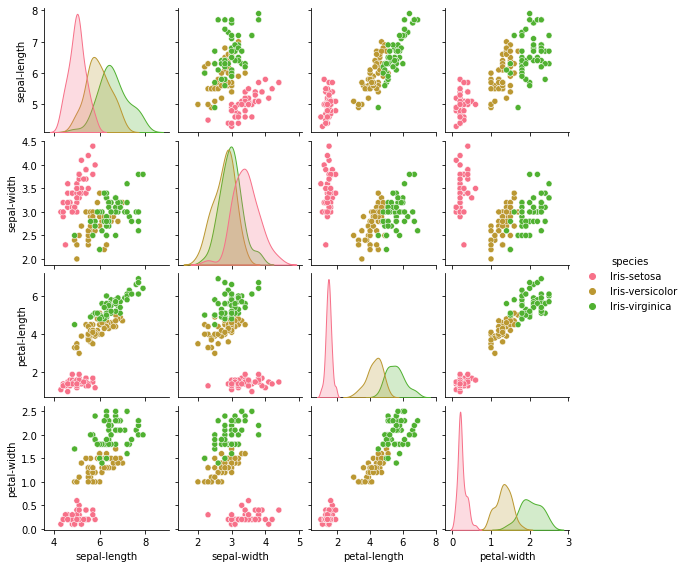

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set_palette('husl')

def create_iris_data_pairplot():
  sns.pairplot(iris_data, hue='species', height = 2, diag_kind = "kde")
  plt.show()

create_iris_data_pairplot() 

We can see in this pairplot visualisation of the iris dataset that Setosa species has significantly higher measurements when it comes to petal width & length, whereas in terms of sepal width the 3 species have a closer association. In terms of sepal width again Setosa iris have a higher reach but not as distinguishable as in the case of petal metrics.

### Exercise 2 - split the data into train and test sets
---

Split the dataset into and 70% train, 30% test, split.  From now, just use the train dataset.


In [121]:
#Import the train_test_split function
from sklearn.model_selection import train_test_split

#Create the classification variables from all columns
train, test = train_test_split(iris_data, test_size=0.30)
print(train)
train.describe()
#'train' is the name for the new separated dataframe for training

     sepal-length  sepal-width  petal-length  petal-width          species
13            4.3          3.0           1.1          0.1      Iris-setosa
79            5.7          2.6           3.5          1.0  Iris-versicolor
73            6.1          2.8           4.7          1.2  Iris-versicolor
102           7.1          3.0           5.9          2.1   Iris-virginica
116           6.5          3.0           5.5          1.8   Iris-virginica
..            ...          ...           ...          ...              ...
113           5.7          2.5           5.0          2.0   Iris-virginica
118           7.7          2.6           6.9          2.3   Iris-virginica
106           4.9          2.5           4.5          1.7   Iris-virginica
132           6.4          2.8           5.6          2.2   Iris-virginica
78            6.0          2.9           4.5          1.5  Iris-versicolor

[105 rows x 5 columns]


,sepal-length,sepal-width,petal-length,petal-width
count,105.000000,105.000000,105.000000,105.000000
mean,5.878095,3.072381,3.841905,1.254286
std,0.839182,0.442348,1.795870,0.778809
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.500000,1.400000
75%,6.400000,3.300000,5.200000,1.900000
max,7.900000,4.400000,6.900000,2.500000


We can see that after applying a split code by a 70% portion and then running the .describe() code, the summary metrics have changed i.e. the count has dropped from 150 to 105. Therefore the 70% train split of the total for training is complete.

### Exercise 3 - assumptions and classification
---

Let's make some assumptions based on the data

1.  Iris-setosa, Iris-versicolor, Iris-virginica are the full range of types of iris to be analysed
2.  Although this is a small dataset, the means are fairly representative

With these in mind, let's start by classifying sepal/petal size into long/short and wide/narrow with values on or above the mean taken as long or wide and those below as short or narrow.

This is a starting point.  We will be trying to find a value (indicator) for each column where rows on or above do not contain any of a particular species, this might indicate that this column is a good (if not rough) indicator of species. For now, the indicator is the mean.

*  Drop any null values from each column

Calculate, and store the means of the four columns

*  **Test**:
Display train.describe() to see the value of the means of the training set.<br> Print the four means and compare to the output of train.describe() to check that they have been calculated correctly.

*  Create a new dataframe with the numeric columns encoded so show a 1 for any value that is above the mean for its column and 0 for any that isn't.

In [122]:
#step1
#Getting the mean for each column and apply a function to encode into 1 (above mean) and 0 (mean or below mean)
def encode(df, **kdws):
  indicator = kdws['indicator']
  key = kdws['key']
  if df[key] > indicator:
    return 1
  else:
    return 0

#step2
#Calculating the means of the metrics columns
sl_mean = train["sepal-length"].mean()
print("mean of sepal length: ", sl_mean)
sw_mean = train["sepal-width"].mean()
print("mean of sepal width: ", sw_mean)
pl_mean = train["petal-length"].mean()
print("mean of petal length: ", pl_mean)
pw_mean = train["petal-width"].mean()
print("mean of petal with: ", pw_mean)

#step3
#Running the function for each column so that each of the four columns are encoded [0 = below mean, 1 = above mean], then drop the original columns, saving as a new dataframe
train_mean = train.copy() #creating a new copy of the original dtframe
train_mean['sepal-length'] = train_mean.apply(encode, axis=1, key='sepal-length', indicator=train['sepal-length'].mean())
train_mean['sepal-width'] = train_mean.apply(encode, axis=1, key='sepal-width', indicator=train['sepal-width'].mean())
train_mean['petal-length'] = train_mean.apply(encode, axis=1, key='petal-length', indicator=train['petal-length'].mean())
train_mean['petal-width'] = train_mean.apply(encode, axis=1, key='petal-width', indicator=train['petal-width'].mean())

print(train_mean)
train_mean

mean of sepal length:  5.878095238095238
mean of sepal width:  3.072380952380952
mean of petal length:  3.841904761904763
mean of petal with:  1.2542857142857136
     sepal-length  sepal-width  petal-length  petal-width          species
13              0            0             0            0      Iris-setosa
79              0            0             0            0  Iris-versicolor
73              1            0             1            0  Iris-versicolor
102             1            0             1            1   Iris-virginica
116             1            0             1            1   Iris-virginica
..            ...          ...           ...          ...              ...
113             0            0             1            1   Iris-virginica
118             1            0             1            1   Iris-virginica
106             0            0             1            1   Iris-virginica
132             1            0             1            1   Iris-virginica
78           

,sepal-length,sepal-width,petal-length,petal-width,species
13,0,0,0,0,Iris-setosa
79,0,0,0,0,Iris-versicolor
73,1,0,1,0,Iris-versicolor
102,1,0,1,1,Iris-virginica
116,1,0,1,1,Iris-virginica
...,...,...,...,...,...
113,0,0,1,1,Iris-virginica
118,1,0,1,1,Iris-virginica
106,0,0,1,1,Iris-virginica
132,1,0,1,1,Iris-virginica


We can see that the calculated means in part 2 of this function match the .describe() calculations we got in the ex 2 above. Furthermore recoding the measurements to 0 and 1 depending on whether the original number was above the mean or not is now the reframed dataset of the original defined with the new variable 'train_mean'.

### Exercise 4 - Calculate the proportion of values **on or above the mean** that are of each species

We are going to focus on the `Iris-virginica` species first.

First we will calculate, for each dimension column (`sepal-length, sepal-width, petal-length, petal-width`) what proportion of values in that column, where the value is on or above the mean, are classified as `Iris-virginica`.

We will do this by filtering all the records in each column of the `train` set that are on or above the mean and match the species.  
Then use the outcome to calculate the proportion of the full `train` set for which a value on or above the mean that are of species `Iris-virginica`.

*  filter for values in the `sepal-length` column being on or above the mean and the species column being `Iris-virginica`.  Then divide the count of rows in this filtered dataset by the count of rows in a second dataset, filtered for just the value being on or above the mean.

*  Do this for all four columns, for **Iris-virginica**  (4 operations).

Print the results to see which columns look like they might most reliably predict the species as `Iris-virginica` (the result is as close as possible to 1).  The highest numbers may indicate the most reliable indicators, but we will do some more before coming to this conclusion.

*  By definition, those on or above the mean that are **NOT Iris_virginica** will be `1 - the proportion of those that are.  Calculate these

The first one has been done for you.

*  We will also need the proportion of those BELOW the median that are NOT Iris-virginica.  Calculate these in the same way



## Iris-virginica above and below mean proportions.
###i) Looking for values above mean.

In [123]:
def get_virginica_above_mean():

  #step1
  #Getting a count of all the rows with name 'iris virginica' in the column species
  train_species_count=train_mean.loc[(train_mean['species']=='Iris-virginica')]['species'].count()
  print("virginica count: ",train_species_count)
  #step2
  #Counting all iris virginica per column with values above the mean
  virginica_count_sl=train_mean.loc[(train_mean['species']=='Iris-virginica')& (train_mean['sepal-length']==1)]['sepal-length'].count()
  virginica_count_sw=train_mean.loc[(train_mean['species']=='Iris-virginica')& (train_mean['sepal-width']==1)]['sepal-width'].count()
  virginica_count_pl=train_mean.loc[(train_mean['species']=='Iris-virginica')& (train_mean['petal-length']==1)]['petal-length'].count()
  virginica_count_pw=train_mean.loc[(train_mean['species']=='Iris-virginica')& (train_mean['petal-width']==1)]['petal-width'].count()
  print("sepal length count:", virginica_count_sl,
         "\nsepal width count:", virginica_count_sw,
         "\npetal length count:", virginica_count_pl,
         "\npetal width count:", virginica_count_pw)
  #step3
  #Calculating the proportion of all iris virginica per column that are above the mean (>1) (count of virginica from step2 / total count of iris virginica from step1)
  proportion_virginica_sl=virginica_count_sl/train_species_count
  proportion_virginica_sw=virginica_count_sw/train_species_count
  proportion_virginica_pl=virginica_count_pl/train_species_count
  proportion_virginica_pw=virginica_count_pw/train_species_count
  print("virginica proportion with sepal legth > mean:", round(proportion_virginica_sl,2),
        "\nvirginica proportion with sepal width > mean:", round(proportion_virginica_sw,2),
        "\nvirginica proportion with petal legth > mean:", round(proportion_virginica_pl,2),
        "\nvirginica proportion with petal width > mean:", round(proportion_virginica_pw,2))
  #step4
  #Calculating the proportion per column that are above the mean and not virginica (calculating as: 1 - proportion from step3)
  proportion2_nonvirginica_sl=1-proportion_virginica_sl
  proportion2_nonvirginica_sw=1-proportion_virginica_sw
  proportion2_nonvirginica_pl=1-proportion_virginica_pl
  proportion2_nonvirginica_pw=1-proportion_virginica_pw
  print("\nnon-virginica proportion with sepal legth > mean:", round(proportion2_nonvirginica_sl,2),
        "\nnon-virginica proportion with sepal width > mean:", round(proportion2_nonvirginica_sw,2),
        "\nnon-virginica proportion with petal legth > mean:", round(proportion2_nonvirginica_pl,2),
        "\nnon-virginica proportion with petal width > mean:", round(proportion2_nonvirginica_pw,2))

get_virginica_above_mean()

virginica count:  41
sepal length count: 35 
sepal width count: 13 
petal length count: 41 
petal width count: 41
virginica proportion with sepal legth > mean: 0.85 
virginica proportion with sepal width > mean: 0.32 
virginica proportion with petal legth > mean: 1.0 
virginica proportion with petal width > mean: 1.0

non-virginica proportion with sepal legth > mean: 0.15 
non-virginica proportion with sepal width > mean: 0.68 
non-virginica proportion with petal legth > mean: 0.0 
non-virginica proportion with petal width > mean: 0.0


### Exercise 5 - Calculate the proportion of each column where the value is below the mean, that are of species `Iris-virginica` and for the other 2 non-virginica species

Repeat the code above, this time looking for values below the mean.

In [124]:
def get_virginica_below_mean():

  #step1
  #Getting a count of all the rows with name 'iris virginica' in the column species
  train_species_count=train_mean.loc[(train_mean['species']=='Iris-virginica')]['species'].count()
  print("virginica count: ",train_species_count)
  #step2
  #Counting all iris virginica per column with values below the mean
  virginica_count_sl=train_mean.loc[(train_mean['species']=='Iris-virginica')& (train_mean['sepal-length']==0)]['sepal-length'].count()
  virginica_count_sw=train_mean.loc[(train_mean['species']=='Iris-virginica')& (train_mean['sepal-width']==0)]['sepal-width'].count()
  virginica_count_pl=train_mean.loc[(train_mean['species']=='Iris-virginica')& (train_mean['petal-length']==0)]['petal-length'].count()
  virginica_count_pw=train_mean.loc[(train_mean['species']=='Iris-virginica')& (train_mean['petal-width']==0)]['petal-width'].count()
  print("sepal length count:", virginica_count_sl,
         "\nsepal width count:", virginica_count_sw,
         "\npetal length count:", virginica_count_pl,
         "\npetal width count:", virginica_count_pw)
  #step3
  #Calculating the proportion of all iris virginica per column that are below the mean (<1) (count of virginica from step2 / total count of iris virginica from step1)
  proportion_virginica_sl=virginica_count_sl/train_species_count
  proportion_virginica_sw=virginica_count_sw/train_species_count
  proportion_virginica_pl=virginica_count_pl/train_species_count
  proportion_virginica_pw=virginica_count_pw/train_species_count
  print("virginica proportion with sepal legth < mean:", round(proportion_virginica_sl,2),
        "\nvirginica proportion with sepal width < mean:", round(proportion_virginica_sw,2),
        "\nvirginica proportion with petal legth < mean:", round(proportion_virginica_pl,2),
        "\nvirginica proportion with petal width < mean:", round(proportion_virginica_pw,2))
  #step4
  #Calculating the proportion per column that are below the mean and not virginica (calculating as: 1 - proportion from step3)
  proportion2_nonvirginica_sl=1-proportion_virginica_sl
  proportion2_nonvirginica_sw=1-proportion_virginica_sw
  proportion2_nonvirginica_pl=1-proportion_virginica_pl
  proportion2_nonvirginica_pw=1-proportion_virginica_pw
  print("\nnon-virginica proportion with sepal legth < mean:", round(proportion2_nonvirginica_sl,2),
        "\nnon-virginica proportion with sepal width < mean:", round(proportion2_nonvirginica_sw,2),
        "\nnon-virginica proportion with petal legth < mean:", round(proportion2_nonvirginica_pl,2),
        "\nnon-virginica proportion with petal width < mean:", round(proportion2_nonvirginica_pw,2))

get_virginica_below_mean()

virginica count:  41
sepal length count: 6 
sepal width count: 28 
petal length count: 0 
petal width count: 0
virginica proportion with sepal legth < mean: 0.15 
virginica proportion with sepal width < mean: 0.68 
virginica proportion with petal legth < mean: 0.0 
virginica proportion with petal width < mean: 0.0

non-virginica proportion with sepal legth < mean: 0.85 
non-virginica proportion with sepal width < mean: 0.32 
non-virginica proportion with petal legth < mean: 1.0 
non-virginica proportion with petal width < mean: 1.0


##ii) Iris-versicolor above & below mean proportions.

In [125]:
def get_versicolor_mean():

  #step1
  #Getting a count of all the rows with name 'iris versicolor' in the column species
  train_species_count=train_mean.loc[(train_mean['species']=='Iris-versicolor')]['species'].count()
  print("versicolor count: ",train_species_count)
  #step2
  #Counting all iris virginica per column with values above the mean
  versicolor_count_sl=train_mean.loc[(train_mean['species']=='Iris-versicolor')& (train_mean['sepal-length']==1)]['sepal-length'].count()
  versicolor_count_sw=train_mean.loc[(train_mean['species']=='Iris-versicolor')& (train_mean['sepal-width']==1)]['sepal-width'].count()
  versicolor_count_pl=train_mean.loc[(train_mean['species']=='Iris-versicolor')& (train_mean['petal-length']==1)]['petal-length'].count()
  versicolor_count_pw=train_mean.loc[(train_mean['species']=='Iris-versicolor')& (train_mean['petal-width']==1)]['petal-width'].count()
  print("sepal length count:", versicolor_count_sl,
         "\nsepal width count:", versicolor_count_sw,
         "\npetal length count:", versicolor_count_pl,
         "\npetal width count:", versicolor_count_pw)
  #step3
  #Calculating the proportion of all iris versicolor per column that are above the mean (>1) (count of versicolor from step2 / total count of iris versicolor from step1)
  proportion_versicolor_sl=versicolor_count_sl/train_species_count
  proportion_versicolor_sw=versicolor_count_sw/train_species_count
  proportion_versicolor_pl=versicolor_count_pl/train_species_count
  proportion_versicolor_pw=versicolor_count_pw/train_species_count
  print("versicolor proportion with sepal legth > mean:", round(proportion_versicolor_sl,2),
        "\nversicolor proportion with sepal width > mean:", round(proportion_versicolor_sw,2),
        "\nversicolor proportion with petal legth > mean:", round(proportion_versicolor_pl,2),
        "\nversicolor proportion with petal width > mean:", round(proportion_versicolor_pw,2))
  
  #step4 - below the mean
  #Counting all iris virginica per column with values below the mean
  versicolor2_count_sl=train_mean.loc[(train_mean['species']=='Iris-versicolor')& (train_mean['sepal-length']==0)]['sepal-length'].count()
  versicolor2_count_sw=train_mean.loc[(train_mean['species']=='Iris-versicolor')& (train_mean['sepal-width']==0)]['sepal-width'].count()
  versicolor2_count_pl=train_mean.loc[(train_mean['species']=='Iris-versicolor')& (train_mean['petal-length']==0)]['petal-length'].count()
  versicolor2_count_pw=train_mean.loc[(train_mean['species']=='Iris-versicolor')& (train_mean['petal-width']==0)]['petal-width'].count()
  print("sepal length count:", versicolor2_count_sl,
         "\nsepal width count:", versicolor2_count_sw,
         "\npetal length count:", versicolor2_count_pl,
         "\npetal width count:", versicolor2_count_pw)
  #step5 - below the mean
  #Calculating the proportion of all iris versicolor per column that are below the mean (<1) (count of versicolor from step2 / total count of iris versicolor from step1)
  proportion_versicolor2_sl=versicolor2_count_sl/train_species_count
  proportion_versicolor2_sw=versicolor2_count_sw/train_species_count
  proportion_versicolor2_pl=versicolor2_count_pl/train_species_count
  proportion_versicolor2_pw=versicolor2_count_pw/train_species_count
  print("versicolor proportion with sepal legth < mean:", round(proportion_versicolor2_sl,2),
        "\nversicolor proportion with sepal width < mean:", round(proportion_versicolor2_sw,2),
        "\nversicolor proportion with petal legth < mean:", round(proportion_versicolor2_pl,2),
        "\nversicolor proportion with petal width < mean:", round(proportion_versicolor2_pw,2))
  
get_versicolor_mean()

versicolor count:  30
sepal length count: 14 
sepal width count: 4 
petal length count: 25 
petal width count: 21
versicolor proportion with sepal legth > mean: 0.47 
versicolor proportion with sepal width > mean: 0.13 
versicolor proportion with petal legth > mean: 0.83 
versicolor proportion with petal width > mean: 0.7
sepal length count: 16 
sepal width count: 26 
petal length count: 5 
petal width count: 9
versicolor proportion with sepal legth < mean: 0.53 
versicolor proportion with sepal width < mean: 0.87 
versicolor proportion with petal legth < mean: 0.17 
versicolor proportion with petal width < mean: 0.3


##ii) Iris-setosa above & below mean proportions.

In [126]:
def get_setosa_mean():

  #step1
  #Getting a count of all the rows with name 'iris setosa' in the column species
  train_species_count=train_mean.loc[(train_mean['species']=='Iris-setosa')]['species'].count()
  print("setosa count: ",train_species_count)
  #step2
  #Counting all iris virginica per column with values above the mean
  setosa_count_sl=train_mean.loc[(train_mean['species']=='Iris-setosa')& (train_mean['sepal-length']==1)]['sepal-length'].count()
  setosa_count_sw=train_mean.loc[(train_mean['species']=='Iris-setosa')& (train_mean['sepal-width']==1)]['sepal-width'].count()
  setosa_count_pl=train_mean.loc[(train_mean['species']=='Iris-setosa')& (train_mean['petal-length']==1)]['petal-length'].count()
  setosa_count_pw=train_mean.loc[(train_mean['species']=='Iris-setosa')& (train_mean['petal-width']==1)]['petal-width'].count()
  print("sepal length count:", setosa_count_sl,
         "\nsepal width count:", setosa_count_sw,
         "\npetal length count:", setosa_count_pl,
         "\npetal width count:", setosa_count_pw)
  #step3
  #Calculating the proportion of all iris setosa per column that are above the mean (>1) (count of setosa from step2 / total count of iris setosa from step1)
  proportion_setosa_sl=setosa_count_sl/train_species_count
  proportion_setosa_sw=setosa_count_sw/train_species_count
  proportion_setosa_pl=setosa_count_pl/train_species_count
  proportion_setosa_pw=setosa_count_pw/train_species_count
  print("setosa proportion with sepal legth > mean:", round(proportion_setosa_sl,2),
        "\nsetosa proportion with sepal width > mean:", round(proportion_setosa_sw,2),
        "\nsetosa proportion with petal legth > mean:", round(proportion_setosa_pl,2),
        "\nsetosa proportion with petal width > mean:", round(proportion_setosa_pw,2))
  
  #step4 - below the mean
  #Counting all iris virginica per column with values below the mean
  setosa2_count_sl=train_mean.loc[(train_mean['species']=='Iris-setosa')& (train_mean['sepal-length']==0)]['sepal-length'].count()
  setosa2_count_sw=train_mean.loc[(train_mean['species']=='Iris-setosa')& (train_mean['sepal-width']==0)]['sepal-width'].count()
  setosa2_count_pl=train_mean.loc[(train_mean['species']=='Iris-setosa')& (train_mean['petal-length']==0)]['petal-length'].count()
  setosa2_count_pw=train_mean.loc[(train_mean['species']=='Iris-setosa')& (train_mean['petal-width']==0)]['petal-width'].count()
  print("sepal length count:", setosa2_count_sl,
         "\nsepal width count:", setosa2_count_sw,
         "\npetal length count:", setosa2_count_pl,
         "\npetal width count:", setosa2_count_pw)
  #step5 - below the mean
  #Calculating the proportion of all iris setosa per column that are below the mean (<1) (count of setosa from step2 / total count of iris setosa from step1)
  proportion_setosa2_sl=setosa2_count_sl/train_species_count
  proportion_setosa2_sw=setosa2_count_sw/train_species_count
  proportion_setosa2_pl=setosa2_count_pl/train_species_count
  proportion_setosa2_pw=setosa2_count_pw/train_species_count
  print("setosa proportion with sepal legth < mean:", round(proportion_setosa2_sl,2),
        "\nsetosa proportion with sepal width < mean:", round(proportion_setosa2_sw,2),
        "\nsetosa proportion with petal legth < mean:", round(proportion_setosa2_pl,2),
        "\nsetosa proportion with petal width < mean:", round(proportion_setosa2_pw,2))
  
get_setosa_mean()

setosa count:  34
sepal length count: 0 
sepal width count: 29 
petal length count: 0 
petal width count: 0
setosa proportion with sepal legth > mean: 0.0 
setosa proportion with sepal width > mean: 0.85 
setosa proportion with petal legth > mean: 0.0 
setosa proportion with petal width > mean: 0.0
sepal length count: 34 
sepal width count: 5 
petal length count: 34 
petal width count: 34
setosa proportion with sepal legth < mean: 1.0 
setosa proportion with sepal width < mean: 0.15 
setosa proportion with petal legth < mean: 1.0 
setosa proportion with petal width < mean: 1.0


### Exercise 6 - predict from the results
---

Create a list of dictionaries from the results Exercise 4 and 5 (e.g. {'species':..., 'above_mean': 0.xx, 'below_mean': 0.xx}  

Then use a loop to go through the list and print:  
*  any species and indicator (above or below mean) that can reliably be predicted.  A reliable prediction may be one over 0.5

In [127]:
#show which columns are reliable predictors
import numpy as np
import pandas as pd

def show_reliable_predictors():
  data = {'species': ["virginica", 'versicolor', 'setosa'], 
        'sepal_length_above_mean': ["0.88", '0.55', '0.0'],
        'sepal_width_above_mean': ["0.32", '0.09', '0.81'],
        'petal_length_above_mean': ["1", '0.91', '0.0'],
        'petal_width_above_mean': ["1", '0.79', '0.0'],
        'sepal_length_below_mean': ["0.12", '0.5', '1'],
        'sepal_width_below_mean': ["0.68", '0.91', '0.19'],
        'petal_length_below_mean': ["0.0", '0.09', '1'],
        'petal_width_below_mean': ["0.0", '0.11', '1']}
  iris_stats = pd.DataFrame(data) #passing column names in the columns parameter 
  print(iris_stats)
  return iris_stats

show_reliable_predictors()

      species sepal_length_above_mean sepal_width_above_mean  \
0   virginica                    0.88                   0.32   
1  versicolor                    0.55                   0.09   
2      setosa                     0.0                   0.81   

  petal_length_above_mean petal_width_above_mean sepal_length_below_mean  \
0                       1                      1                    0.12   
1                    0.91                   0.79                     0.5   
2                     0.0                    0.0                       1   

  sepal_width_below_mean petal_length_below_mean petal_width_below_mean  
0                   0.68                     0.0                    0.0  
1                   0.91                    0.09                   0.11  
2                   0.19                       1                      1  


,species,sepal_length_above_mean,sepal_width_above_mean,petal_length_above_mean,petal_width_above_mean,sepal_length_below_mean,sepal_width_below_mean,petal_length_below_mean,petal_width_below_mean
0,virginica,0.88,0.32,1,1,0.12,0.68,0.0,0.0
1,versicolor,0.55,0.09,0.91,0.79,0.5,0.91,0.09,0.11
2,setosa,0.0,0.81,0.0,0.0,1,0.19,1,1


In order to identify certain predictors as reliable, we need to look at values that are over 0.5.<br>

We can conclude as reliable predictors for each species, the following from the table above:
- **Virginica**: 
sepal_length_above_mean, petal_length_above_mean, width_above_mean, and sepal_width_below_mean are all above 0.5 with the strongest ones being petal length & width above mean that are equal to 1.
- **Versicolor**: there is a clear reliability in all above mean petal metrics and the only sepal metric that makes the mark is sepal_length_below_mean.
- **Setosa**: there is a distinctive lack of reliability in the above mean values for this species with the exception of sepal_width_above_mean. And the rverse applies for below men values with the sepal_width_below_mean being the only one not passing the 0.5 threshold.

### Exercise 6 - Make a decision tree
---

Use pencil and paper or a graphical application to create a decision tree for Iris-virginica, using the following rules (use the picture below as a guide):

*  The column with the highest indicator is placed at the top
*  Other columns are placed in order below
*  The rest of the columns are placed in order below these

Any column where one branch (on or above mean OR below mean) has an indicator of 0, could be classified as a strong indicator of Iris_virginica being the species.  Anything else, unless there is something very close to 0, could be classified as a weak indicator of Iris_virginica being the species.

Let's code the decision tree using the following logic for this decision tree (yours might be slightly different):

![Decision tree](https://drive.google.com/uc?id=1CTo23EHwR2IPCRjcfSyCQsT_oQ5Exwso)

In the decision tree above, there is no certainty below petal-length so our decision tree will only include petal-width and petal-length.




###Calculations for mean:

The Decision Tree based on the above calculations is as follows:
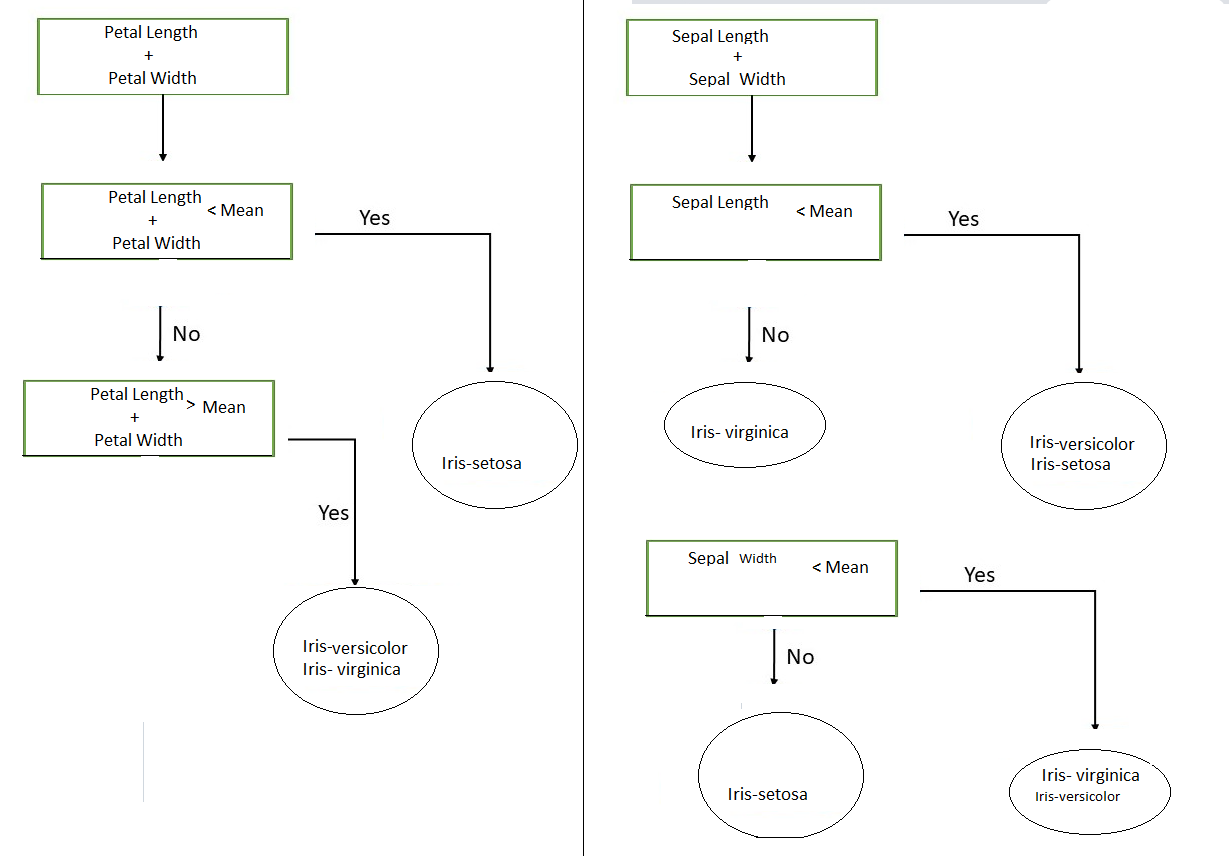

In [128]:
def get_species(df):
  # ADD CODE HERE TO RETURN None if petal-width is below mean (encoded as 0) or if petal-length is below mean (encoded as 0), otherwise return 'Iris-virginia'
    if df['petal-width'] == 0:
        return None
        if df['petal-length'] == 0:
            return None
            if df['sepal-length'] == 0:
                return None
    return 'Iris-virginica' 

# use the get_species(df) function to predict the species, count how many are predicted correct and use this to calculate the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
  species = get_species(test.iloc[i])
  if species == test.iloc[i]['species']:
      correct += 1

print ("Proportion correctly identified", correct / test_size) 


Proportion correctly identified 0.2


### Exercise 7 - change the measure into median

We are currently using the mean to act as the decision making line.  We can use the decision tree with a different line.

Change the mean values so that you are instead using the **median** instead for all four columns.  The code should not need changing except for where you calculated the mean.

Run all the code again.  Is the proportion of correct values better this time?   Is the decision tree still appropriate?


In [129]:
#Get the median for each column and apply a function to encode into 1 (above median) and 0 (median or below median)
#step1
def encode2(df, **kdws):
  indicator2 = kdws['indicator2']
  key = kdws['key']
  if df[key] > indicator2:
    return 1
  else:
    return 0

#step2
#Calculating the medians of the metrics columns
sl_median = train["sepal-length"].median()
print("median of sepal length: ", sl_median)
sw_median = train["sepal-width"].median()
print("median of sepal width: ", sw_median)
pl_median = train["petal-length"].median()
print("median of petal length: ", pl_median)
pw_median = train["petal-width"].median()
print("median of petal with: ", pw_median)

#step3
#Run the function for each column so that each of the four columns are encoded [0 = below median, 1 = above median], then drop the original columns, saving as a new dataframe
train_median = train.copy() #creating a new copy of the original dtframe
train_median['sepal-length'] = train_median.apply(encode, axis=1, key='sepal-length', indicator=train['sepal-length'].median())
train_median['sepal-width'] = train_median.apply(encode, axis=1, key='sepal-width', indicator=train['sepal-width'].median())
train_median['petal-length'] = train_median.apply(encode, axis=1, key='petal-length', indicator=train['petal-length'].median())
train_median['petal-width'] = train_median.apply(encode, axis=1, key='petal-width', indicator=train['petal-width'].median())

print(train_median)
train_median

median of sepal length:  5.8
median of sepal width:  3.0
median of petal length:  4.5
median of petal with:  1.4
     sepal-length  sepal-width  petal-length  petal-width          species
13              0            0             0            0      Iris-setosa
79              0            0             0            0  Iris-versicolor
73              1            0             1            0  Iris-versicolor
102             1            0             1            1   Iris-virginica
116             1            0             1            1   Iris-virginica
..            ...          ...           ...          ...              ...
113             0            0             1            1   Iris-virginica
118             1            0             1            1   Iris-virginica
106             0            0             0            1   Iris-virginica
132             1            0             1            1   Iris-virginica
78              1            0             0            1  Iri

,sepal-length,sepal-width,petal-length,petal-width,species
13,0,0,0,0,Iris-setosa
79,0,0,0,0,Iris-versicolor
73,1,0,1,0,Iris-versicolor
102,1,0,1,1,Iris-virginica
116,1,0,1,1,Iris-virginica
...,...,...,...,...,...
113,0,0,1,1,Iris-virginica
118,1,0,1,1,Iris-virginica
106,0,0,0,1,Iris-virginica
132,1,0,1,1,Iris-virginica


##Iris-virginica above & below median proportions.

In [130]:
def get_virginica_median():

  #step1
  #Getting a count of all the rows with name 'iris virginica' in the column species
  train_species_count=train_median.loc[(train_median['species']=='Iris-virginica')]['species'].count()
  print("virginica count: ",train_species_count)
  #step2
  #Counting all iris virginica per column with values above the median
  virginica_count_sl=train_median.loc[(train_median['species']=='Iris-virginica')& (train_median['sepal-length']==1)]['sepal-length'].count()
  virginica_count_sw=train_median.loc[(train_median['species']=='Iris-virginica')& (train_median['sepal-width']==1)]['sepal-width'].count()
  virginica_count_pl=train_median.loc[(train_median['species']=='Iris-virginica')& (train_median['petal-length']==1)]['petal-length'].count()
  virginica_count_pw=train_median.loc[(train_median['species']=='Iris-virginica')& (train_median['petal-width']==1)]['petal-width'].count()
  print("sepal length count:", virginica_count_sl,
         "\nsepal width count:", virginica_count_sw,
         "\npetal length count:", virginica_count_pl,
         "\npetal width count:", virginica_count_pw)
  #step3
  #Calculating the proportion of all iris virginica per column that are above the median (>1) (count of virginica from step2 / total count of iris virginica from step1)
  proportion_virginica_sl=virginica_count_sl/train_species_count
  proportion_virginica_sw=virginica_count_sw/train_species_count
  proportion_virginica_pl=virginica_count_pl/train_species_count
  proportion_virginica_pw=virginica_count_pw/train_species_count
  print("virginica proportion with sepal legth > median:", round(proportion_virginica_sl,2),
        "\nvirginica proportion with sepal width > median:", round(proportion_virginica_sw,2),
        "\nvirginica proportion with petal legth > median:", round(proportion_virginica_pl,2),
        "\nvirginica proportion with petal width > median:", round(proportion_virginica_pw,2))
  
  #step4 - below the median
  #Counting all iris virginica per column with values below the median
  virginica2_count_sl=train_median.loc[(train_median['species']=='Iris-virginica')& (train_median['sepal-length']==0)]['sepal-length'].count()
  virginica2_count_sw=train_median.loc[(train_median['species']=='Iris-virginica')& (train_median['sepal-width']==0)]['sepal-width'].count()
  virginica2_count_pl=train_median.loc[(train_median['species']=='Iris-virginica')& (train_median['petal-length']==0)]['petal-length'].count()
  virginica2_count_pw=train_median.loc[(train_median['species']=='Iris-virginica')& (train_median['petal-width']==0)]['petal-width'].count()
  print("sepal length count:", virginica2_count_sl,
         "\nsepal width count:", virginica2_count_sw,
         "\npetal length count:", virginica2_count_pl,
         "\npetal width count:", virginica2_count_pw)
  #step5 - below the median
  #Calculating the proportion of all iris virginica per column that are below the median (<1) (count of virginica from step2 / total count of iris virginica from step1)
  proportion_virginica2_sl=virginica2_count_sl/train_species_count
  proportion_virginica2_sw=virginica2_count_sw/train_species_count
  proportion_virginica2_pl=virginica2_count_pl/train_species_count
  proportion_virginica2_pw=virginica2_count_pw/train_species_count
  print("virginica proportion with sepal legth < median:", round(proportion_virginica2_sl,2),
        "\nvirginica proportion with sepal width < median:", round(proportion_virginica2_sw,2),
        "\nvirginica proportion with petal legth < median:", round(proportion_virginica2_pl,2),
        "\nvirginica proportion with petal width < median:", round(proportion_virginica2_pw,2))
  
get_virginica_median()

virginica count:  41
sepal length count: 35 
sepal width count: 13 
petal length count: 40 
petal width count: 40
virginica proportion with sepal legth > median: 0.85 
virginica proportion with sepal width > median: 0.32 
virginica proportion with petal legth > median: 0.98 
virginica proportion with petal width > median: 0.98
sepal length count: 6 
sepal width count: 28 
petal length count: 1 
petal width count: 1
virginica proportion with sepal legth < median: 0.15 
virginica proportion with sepal width < median: 0.68 
virginica proportion with petal legth < median: 0.02 
virginica proportion with petal width < median: 0.02


## Iris-versicolor above & below median proportions.

In [131]:
def get_versicolor_median():

  #step1
  #Getting a count of all the rows with name 'iris versicolor' in the column species
  train_species_count=train_median.loc[(train_median['species']=='Iris-versicolor')]['species'].count()
  print("versicolor count: ",train_species_count)
  #step2
  #Counting all iris virginica per column with values above the median
  versicolor_count_sl=train_median.loc[(train_median['species']=='Iris-versicolor')& (train_median['sepal-length']==1)]['sepal-length'].count()
  versicolor_count_sw=train_median.loc[(train_median['species']=='Iris-versicolor')& (train_median['sepal-width']==1)]['sepal-width'].count()
  versicolor_count_pl=train_median.loc[(train_median['species']=='Iris-versicolor')& (train_median['petal-length']==1)]['petal-length'].count()
  versicolor_count_pw=train_median.loc[(train_median['species']=='Iris-versicolor')& (train_median['petal-width']==1)]['petal-width'].count()
  print("sepal length count:", versicolor_count_sl,
         "\nsepal width count:", versicolor_count_sw,
         "\npetal length count:", versicolor_count_pl,
         "\npetal width count:", versicolor_count_pw)
  #step3
  #Calculating the proportion of all iris versicolor per column that are above the median (>1) (count of versicolor from step2 / total count of iris versicolor from step1)
  proportion_versicolor_sl=versicolor_count_sl/train_species_count
  proportion_versicolor_sw=versicolor_count_sw/train_species_count
  proportion_versicolor_pl=versicolor_count_pl/train_species_count
  proportion_versicolor_pw=versicolor_count_pw/train_species_count
  print("versicolor proportion with sepal legth > median:", round(proportion_versicolor_sl,2),
        "\nversicolor proportion with sepal width > median:", round(proportion_versicolor_sw,2),
        "\nversicolor proportion with petal legth > median:", round(proportion_versicolor_pl,2),
        "\nversicolor proportion with petal width > median:", round(proportion_versicolor_pw,2))
  
  #step4 - below the median
  #Counting all iris virginica per column with values below the median
  versicolor2_count_sl=train_median.loc[(train_median['species']=='Iris-versicolor')& (train_median['sepal-length']==0)]['sepal-length'].count()
  versicolor2_count_sw=train_median.loc[(train_median['species']=='Iris-versicolor')& (train_median['sepal-width']==0)]['sepal-width'].count()
  versicolor2_count_pl=train_median.loc[(train_median['species']=='Iris-versicolor')& (train_median['petal-length']==0)]['petal-length'].count()
  versicolor2_count_pw=train_median.loc[(train_median['species']=='Iris-versicolor')& (train_median['petal-width']==0)]['petal-width'].count()
  print("sepal length count:", versicolor2_count_sl,
         "\nsepal width count:", versicolor2_count_sw,
         "\npetal length count:", versicolor2_count_pl,
         "\npetal width count:", versicolor2_count_pw)
  #step5 - below the median
  #Calculating the proportion of all iris versicolor per column that are below the median (<1) (count of versicolor from step2 / total count of iris versicolor from step1)
  proportion_versicolor2_sl=versicolor2_count_sl/train_species_count
  proportion_versicolor2_sw=versicolor2_count_sw/train_species_count
  proportion_versicolor2_pl=versicolor2_count_pl/train_species_count
  proportion_versicolor2_pw=versicolor2_count_pw/train_species_count
  print("versicolor proportion with sepal legth < median:", round(proportion_versicolor2_sl,2),
        "\nversicolor proportion with sepal width < median:", round(proportion_versicolor2_sw,2),
        "\nversicolor proportion with petal legth < median:", round(proportion_versicolor2_pl,2),
        "\nversicolor proportion with petal width < median:", round(proportion_versicolor2_pw,2))
  
get_versicolor_median()

versicolor count:  30
sepal length count: 14 
sepal width count: 4 
petal length count: 8 
petal width count: 11
versicolor proportion with sepal legth > median: 0.47 
versicolor proportion with sepal width > median: 0.13 
versicolor proportion with petal legth > median: 0.27 
versicolor proportion with petal width > median: 0.37
sepal length count: 16 
sepal width count: 26 
petal length count: 22 
petal width count: 19
versicolor proportion with sepal legth < median: 0.53 
versicolor proportion with sepal width < median: 0.87 
versicolor proportion with petal legth < median: 0.73 
versicolor proportion with petal width < median: 0.63


## Iris-setosa above & below median proportions.

In [132]:
def get_setosa_median():

  #step1
  #Getting a count of all the rows with name 'iris setosa' in the column species
  train_species_count=train_median.loc[(train_median['species']=='Iris-setosa')]['species'].count()
  print("setosa count: ",train_species_count)
  #step2
  #Counting all iris virginica per column with values above the median
  setosa_count_sl=train_median.loc[(train_median['species']=='Iris-setosa')& (train_median['sepal-length']==1)]['sepal-length'].count()
  setosa_count_sw=train_median.loc[(train_median['species']=='Iris-setosa')& (train_median['sepal-width']==1)]['sepal-width'].count()
  setosa_count_pl=train_median.loc[(train_median['species']=='Iris-setosa')& (train_median['petal-length']==1)]['petal-length'].count()
  setosa_count_pw=train_median.loc[(train_median['species']=='Iris-setosa')& (train_median['petal-width']==1)]['petal-width'].count()
  print("sepal length count:", setosa_count_sl,
         "\nsepal width count:", setosa_count_sw,
         "\npetal length count:", setosa_count_pl,
         "\npetal width count:", setosa_count_pw)
  #step3
  #Calculating the proportion of all iris setosa per column that are above the median (>1) (count of setosa from step2 / total count of iris setosa from step1)
  proportion_setosa_sl=setosa_count_sl/train_species_count
  proportion_setosa_sw=setosa_count_sw/train_species_count
  proportion_setosa_pl=setosa_count_pl/train_species_count
  proportion_setosa_pw=setosa_count_pw/train_species_count
  print("setosa proportion with sepal legth > median:", round(proportion_setosa_sl,2),
        "\nsetosa proportion with sepal width > median:", round(proportion_setosa_sw,2),
        "\nsetosa proportion with petal legth > median:", round(proportion_setosa_pl,2),
        "\nsetosa proportion with petal width > median:", round(proportion_setosa_pw,2))
  
  #step4 - below the median
  #Counting all iris virginica per column with values below the median
  setosa2_count_sl=train_median.loc[(train_median['species']=='Iris-setosa')& (train_median['sepal-length']==0)]['sepal-length'].count()
  setosa2_count_sw=train_median.loc[(train_median['species']=='Iris-setosa')& (train_median['sepal-width']==0)]['sepal-width'].count()
  setosa2_count_pl=train_median.loc[(train_median['species']=='Iris-setosa')& (train_median['petal-length']==0)]['petal-length'].count()
  setosa2_count_pw=train_median.loc[(train_median['species']=='Iris-setosa')& (train_median['petal-width']==0)]['petal-width'].count()
  print("sepal length count:", setosa2_count_sl,
         "\nsepal width count:", setosa2_count_sw,
         "\npetal length count:", setosa2_count_pl,
         "\npetal width count:", setosa2_count_pw)

  #step5 - below the median
  #Calculating the proportion of all iris setosa per column that are below the median (<1) (count of setosa from step2 / total count of iris setosa from step1)
  proportion_setosa2_sl=setosa2_count_sl/train_species_count
  proportion_setosa2_sw=setosa2_count_sw/train_species_count
  proportion_setosa2_pl=setosa2_count_pl/train_species_count
  proportion_setosa2_pw=setosa2_count_pw/train_species_count
  print("setosa proportion with sepal legth < median:", round(proportion_setosa2_sl,2),
        "\nsetosa proportion with sepal width < median:", round(proportion_setosa2_sw,2),
        "\nsetosa proportion with petal legth < median:", round(proportion_setosa2_pl,2),
        "\nsetosa proportion with petal width < median:", round(proportion_setosa2_pw,2))
  
get_setosa_median()

setosa count:  34
sepal length count: 0 
sepal width count: 29 
petal length count: 0 
petal width count: 0
setosa proportion with sepal legth > median: 0.0 
setosa proportion with sepal width > median: 0.85 
setosa proportion with petal legth > median: 0.0 
setosa proportion with petal width > median: 0.0
sepal length count: 34 
sepal width count: 5 
petal length count: 34 
petal width count: 34
setosa proportion with sepal legth < median: 1.0 
setosa proportion with sepal width < median: 0.15 
setosa proportion with petal legth < median: 1.0 
setosa proportion with petal width < median: 1.0


###Distribution of petal mean values for virginica, setosa and versicolor.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


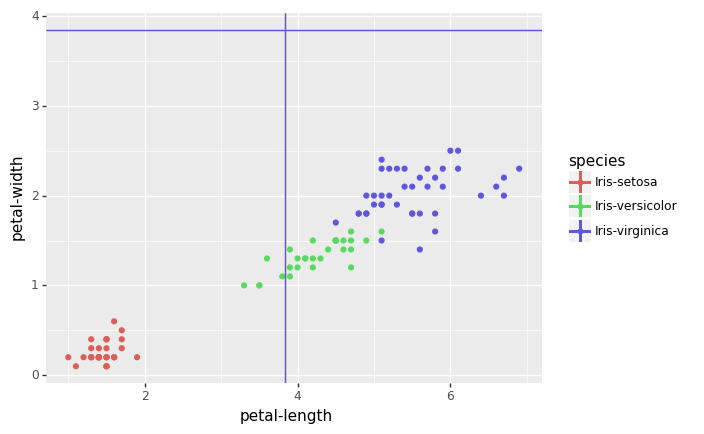

<ggplot: (8760456146181)>

In [133]:
## this type of plot will show the distribution on a chart using mean. The line crossing the chart is defined by the geom_vline part of the code.
from plotnine import *
ggplot(train, aes(x='petal-length', y='petal-width', color='species')) + geom_point() + geom_vline(train, aes(xintercept=train['petal-length'].mean(), color='species')) + geom_hline(train, aes(yintercept=train['petal-length'].mean(), color='species'))

###Distribution of petal median values for virginica, setosa and versicolor.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


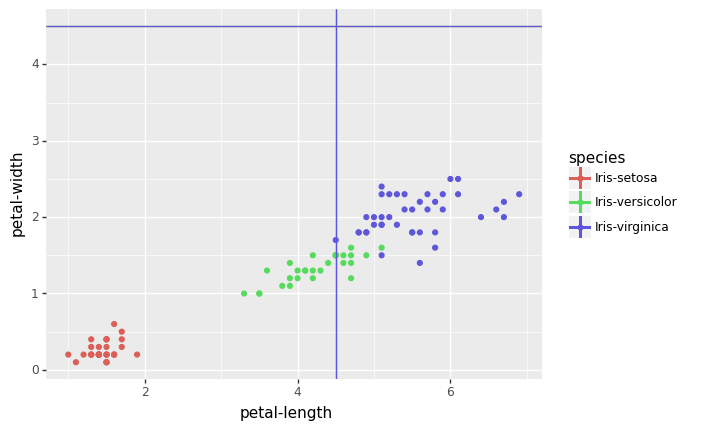

<ggplot: (8760456150109)>

In [134]:
## this type of plot will show the median distribution on a chart.
from plotnine import *
ggplot(train, aes(x='petal-length', y='petal-width', color='species')) + geom_point() + geom_vline(train, aes(xintercept=train['petal-length'].median(), color='species')) + geom_hline(train, aes(yintercept=train['petal-length'].median(), color='species'))

###Distribution of sepal mean values for virginica, setosa and versicolor.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


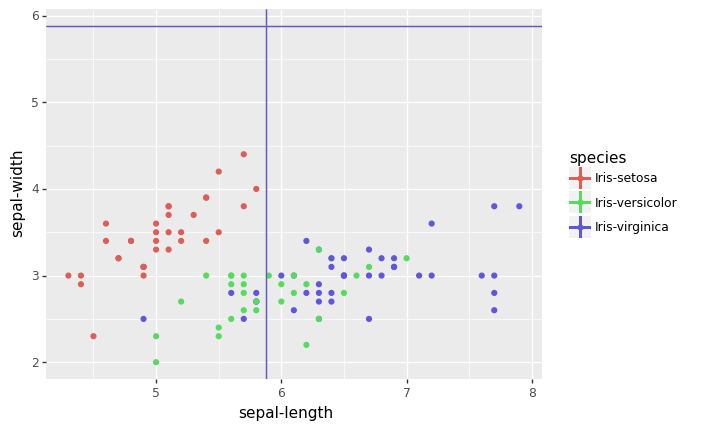

<ggplot: (8760456133465)>

In [135]:
## this type of plot will show the distribution on a chart using mean. The line crossing the chart is defined by the geom_vline part of the code.
from plotnine import *
ggplot(train, aes(x='sepal-length', y='sepal-width', color='species')) + geom_point() + geom_vline(train, aes(xintercept=train['sepal-length'].mean(), color='species')) + geom_hline(train, aes(yintercept=train['sepal-length'].mean(), color='species'))

###Distribution of sepal median values for virginica, setosa and versicolor.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


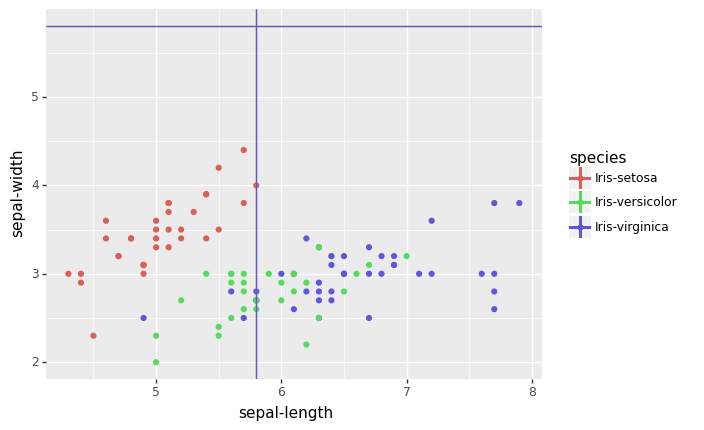

<ggplot: (8760456065925)>

In [136]:
## this type of plot will show the distribution on a chart using median. The line crossing the chart is defined by the geom_vline part of the code.
from plotnine import *
ggplot(train, aes(x='sepal-length', y='sepal-width', color='species')) + geom_point() + geom_vline(train, aes(xintercept=train['sepal-length'].median(), color='species')) + geom_hline(train, aes(yintercept=train['sepal-length'].median(), color='species'))

###Reflection:

The skills practised for this project were grouping and splitting parts of a column for analysis, adding headings to columns as the original dataframe didn't have any, producing a decision tree on the basis of calculations of metrics like the mean value, including ggplot visualisation with a plotnine (which is an implementation of a grammar of graphics in Python, it is based on ggplot2. The grammar allows users to compose plots by explicitly mapping data to the visual objects that make up the plot).

Overall the decision-tree project was challenging in terms of specifying the target hypothesis and process of calculating, excluding/including parameters and making a prediction decision tree as the end result of the data analysis.